In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from collections import Counter
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [114]:
# Loading the dataset.
red_wine = pd.read_csv('C:\\Users\\kenne\\Desktop\\winequality-red.csv', encoding='utf-8')

In [115]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The dataset on red wine quality contains 1,599 rows and 12 columns.

In [116]:
red_wine.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [117]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in the dataset.

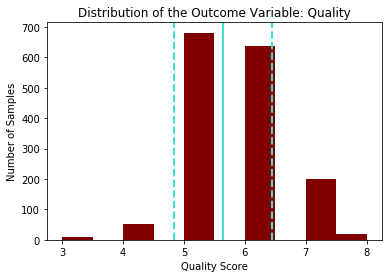

In [144]:
plt.hist(red_wine['quality'], color='maroon')

plt.ylabel('Number of Samples')
plt.xlabel('Quality Score')
plt.title('Distribution of the Outcome Variable: Quality')

x = red_wine['quality']
plt.axvline(x.mean(), color='turquoise', linestyle='solid', linewidth=2)
plt.axvline(x.mean() + x.std(), color='turquoise', linestyle='dashed', linewidth=2)
plt.axvline(x.mean() - x.std(), color='turquoise', linestyle='dashed', linewidth=2)

plt.show()

The dependent variable, quality, is normally distributed. The data is not centered but clusters at the mean and the majority of the data is with one standard deviation.

C:\Users\kenne\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kenne\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kenne\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kenne\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kenne\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

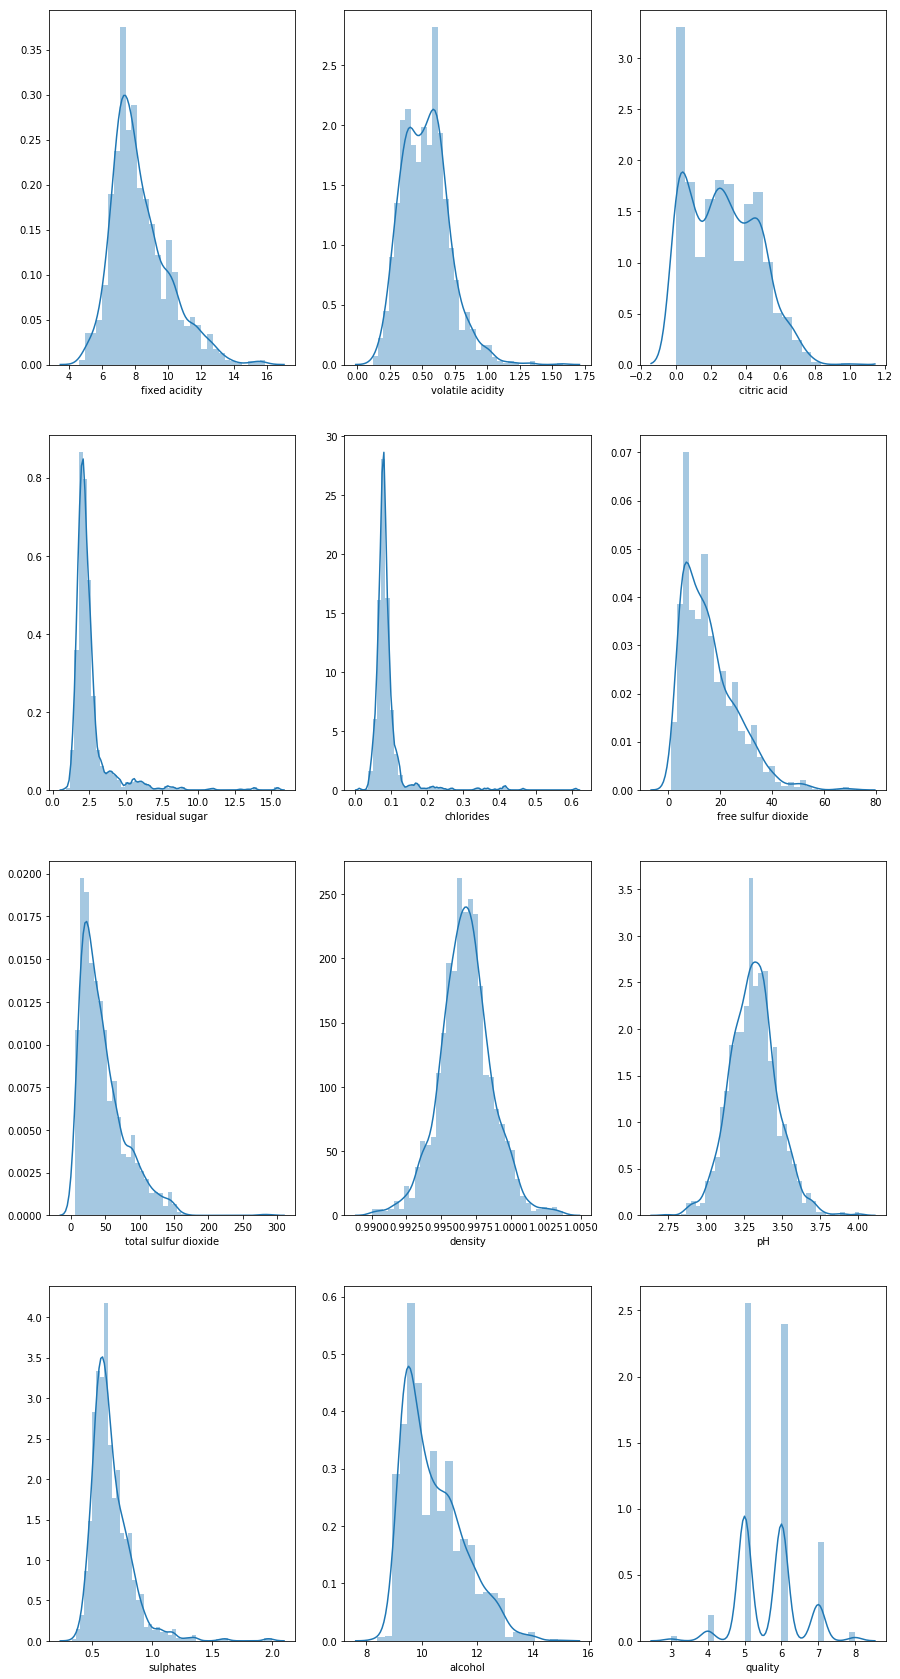

In [6]:
fig, ax = plt.subplots(4,3, figsize=(15, 30))

sns.distplot(red_wine['fixed acidity'], ax=ax[0][0])
sns.distplot(red_wine['volatile acidity'], ax=ax[0][1])
sns.distplot(red_wine['citric acid'], ax=ax[0][2])

sns.distplot(red_wine['residual sugar'], ax=ax[1][0])
sns.distplot(red_wine.chlorides, ax=ax[1][1])
sns.distplot(red_wine['free sulfur dioxide'], ax=ax[1][2])

sns.distplot(red_wine['total sulfur dioxide'], ax=ax[2][0])
sns.distplot(red_wine.density, ax=ax[2][1])
sns.distplot(red_wine.pH, ax=ax[2][2])

sns.distplot(red_wine.sulphates, ax=ax[3][0])
sns.distplot(red_wine.alcohol, ax=ax[3][1])
sns.distplot(red_wine.quality, ax=ax[3][2])

plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


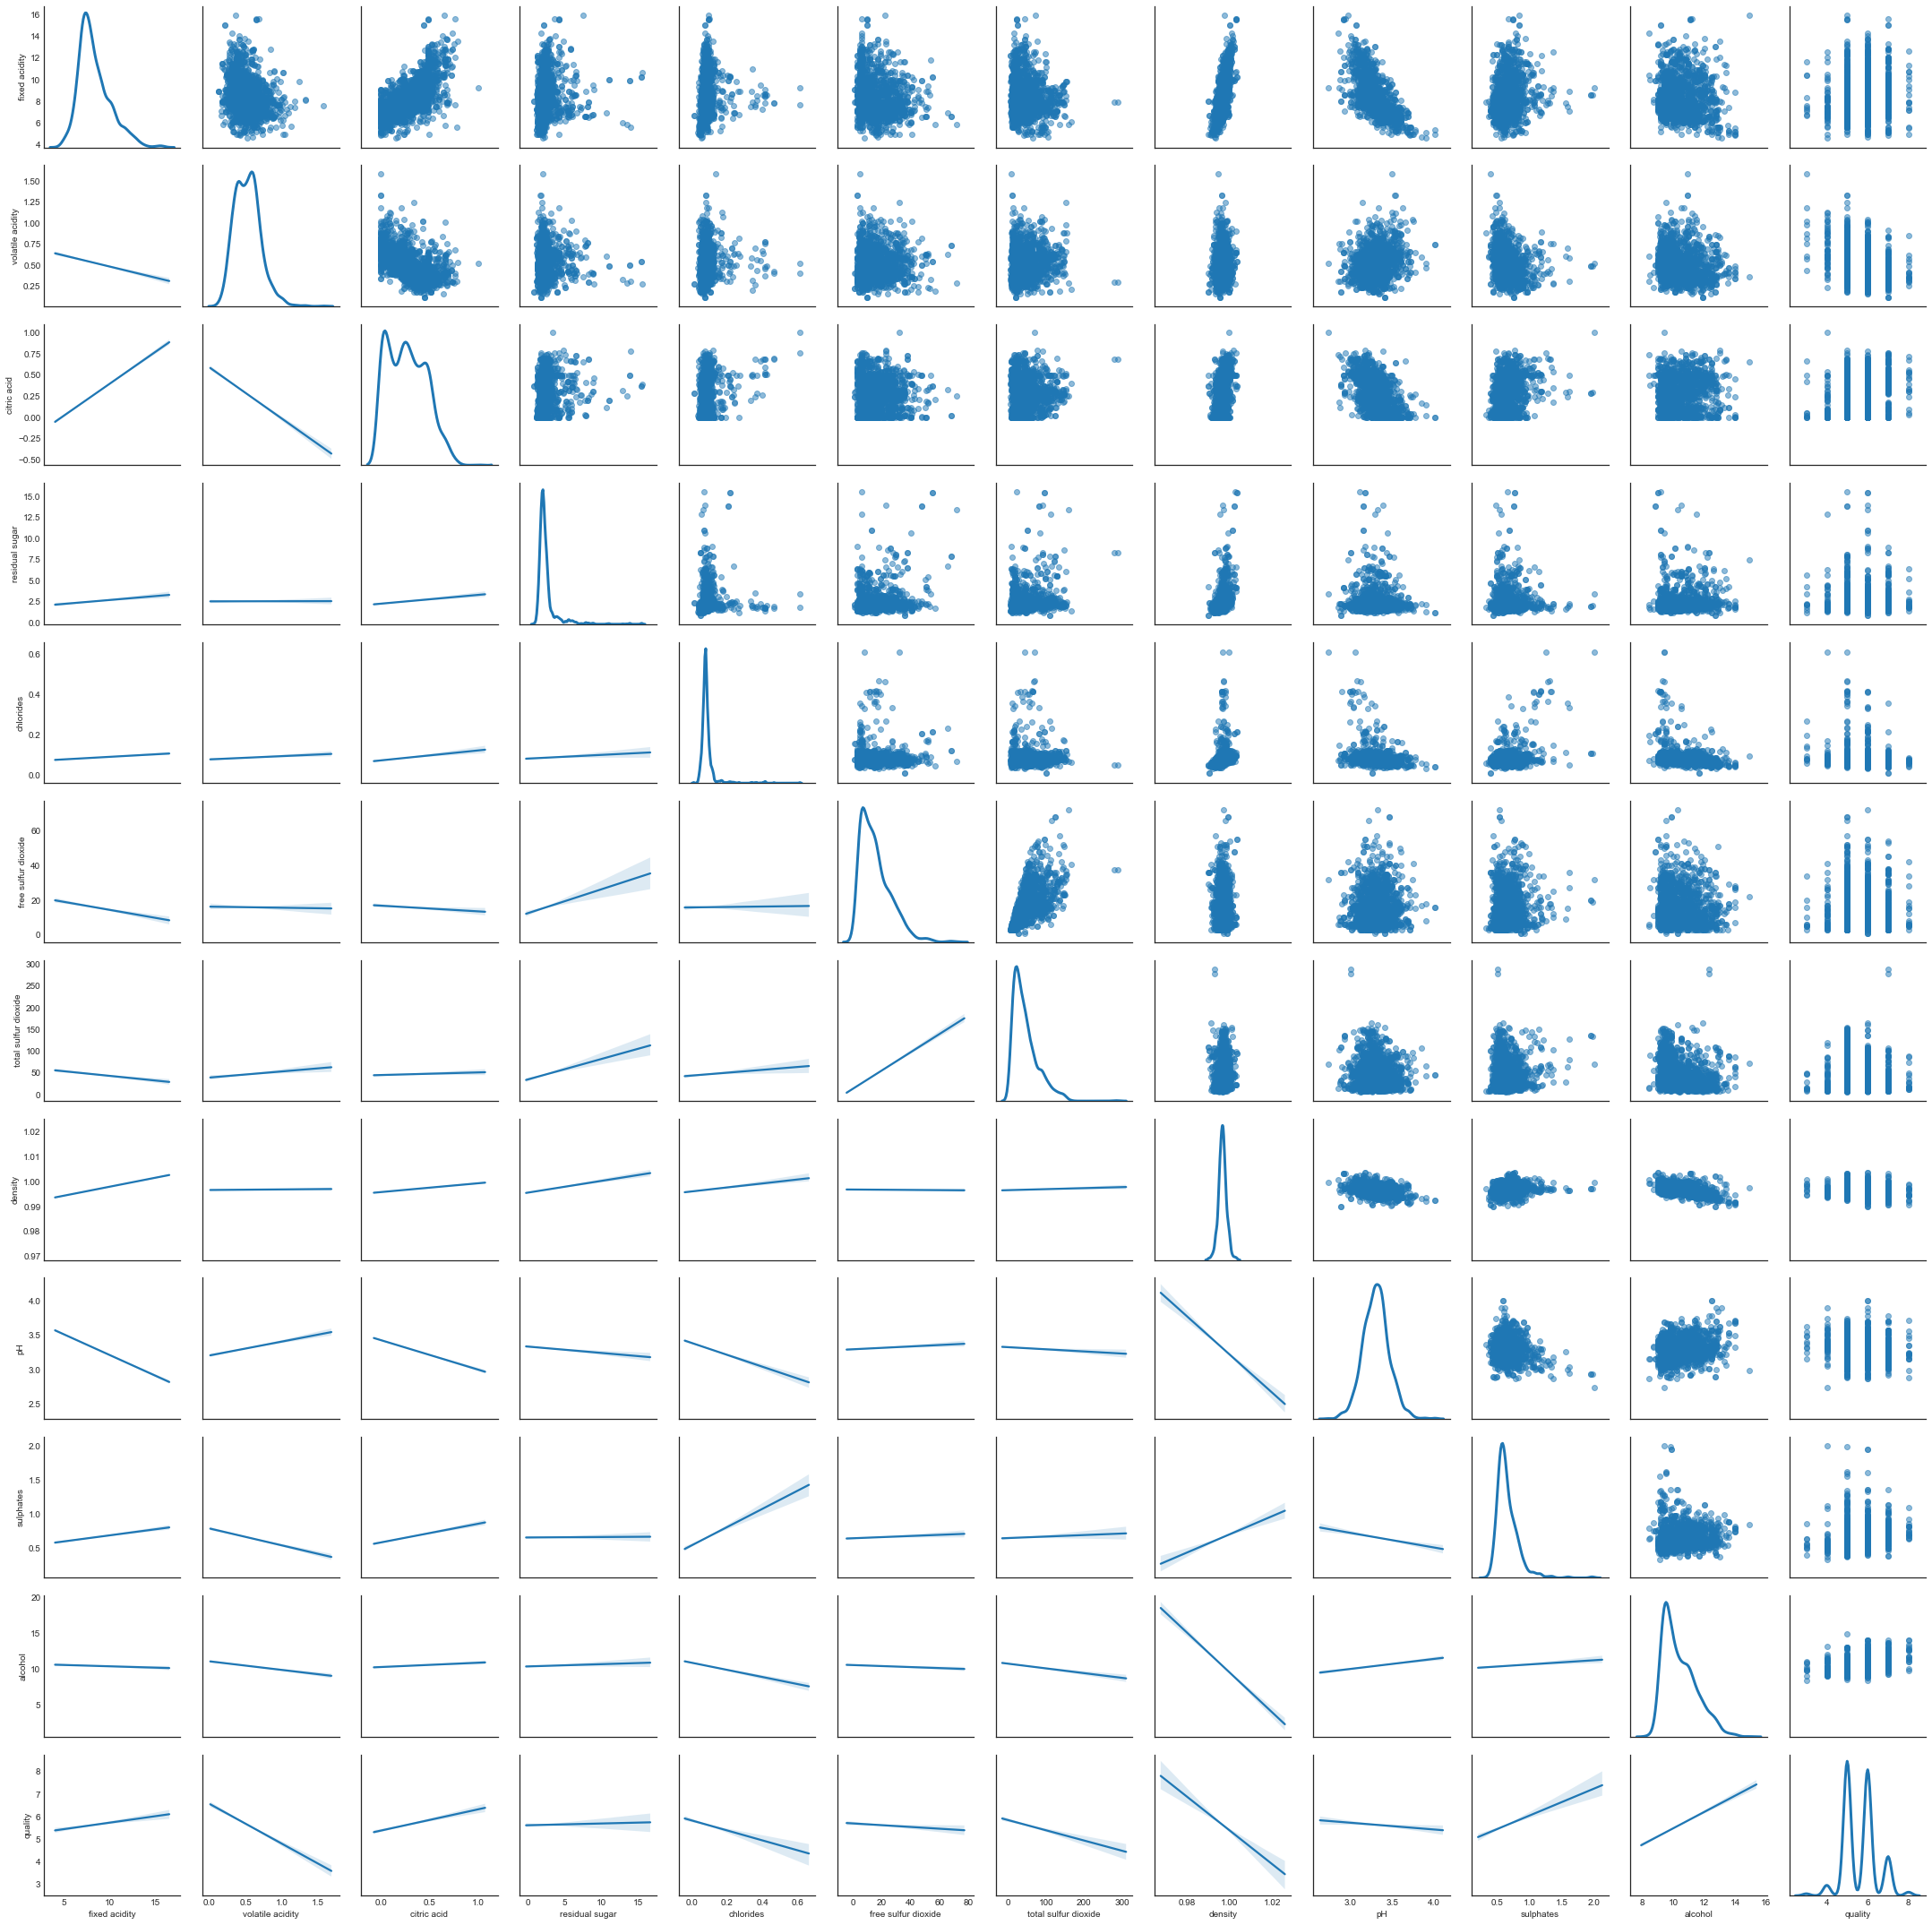

In [25]:
# Reviewing the correlation between variables in the dataset.

# Create a scatterplot matrix that shows all the bivariate relationships in the dataset.
sns.set_style('white')

g = sns.PairGrid(red_wine, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)

plt.show()

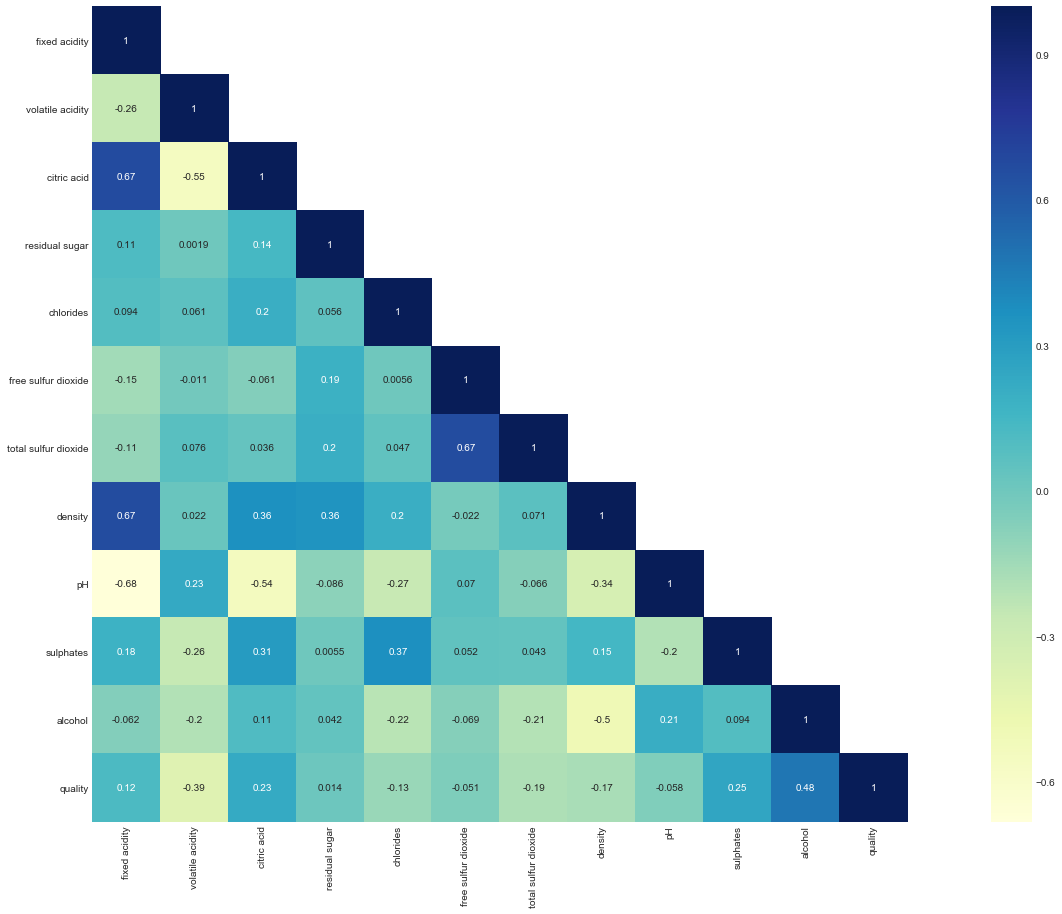

In [24]:
# Create a heatmap with correlation matrix embedded in each square.
plt.figure(figsize=(30,15))

cor_mat = red_wine.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(red_wine.corr(), mask=mask, cmap='YlGnBu', square=True, annot=True)

plt.show()

In [10]:
# Create a standalone correlation matrix.
red_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Correlations range from -1 (as values in one variable go up, values in the other go down) to 0 (no relationship between the variables) to 1 (as values in one variable go up, values in the other go up as well).

The quality of red wine, the target variable, is most correlated with alcohol followed by sulphates and citric acid, in that order and at nearly half the correlation of alcohol.

Residual sugar, free sulfur dioxide and pH show the smallest relationship to our target variable quality and will be considered for removal as model features.

We could consider consolidation amongst due to redundancy between some of the independent variables, such as free sulfur dioxide and total sulfur dioxide as well as fixed acidity and citric acid.

In [7]:
# Converting the target variable quality into categories for classification purposes within a new column.

# We'll take the recommendation found in the metadata that any wine with a quality score of 7 or higher is considered good.
# But we'll add an intermediate value of Average for quality scores of 5 and 6. The remainder is marked as Poor quality.

grade = []
for qual in red_wine['quality']:
    if qual < 5:
        grade.append('Poor')
    elif qual >= 5 and qual < 7:
        grade.append('Average')
    else:
        grade.append('Good')
red_wine['grade'] = grade

In [8]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Average


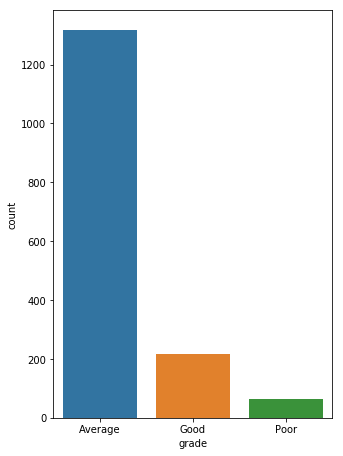

In [9]:
# Continue exploratory data analyis with new categorical variable before encoding for modeling purposes.

# View results by new grade categories.
plt.figure(figsize=(5,7.5))

sns.countplot(red_wine['grade'])

plt.show()

In [10]:
Counter(red_wine['grade'])

Counter({'Average': 1319, 'Good': 217, 'Poor': 63})

The lions share of the wines in the dataset are considered average.

C:\Users\kenne\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


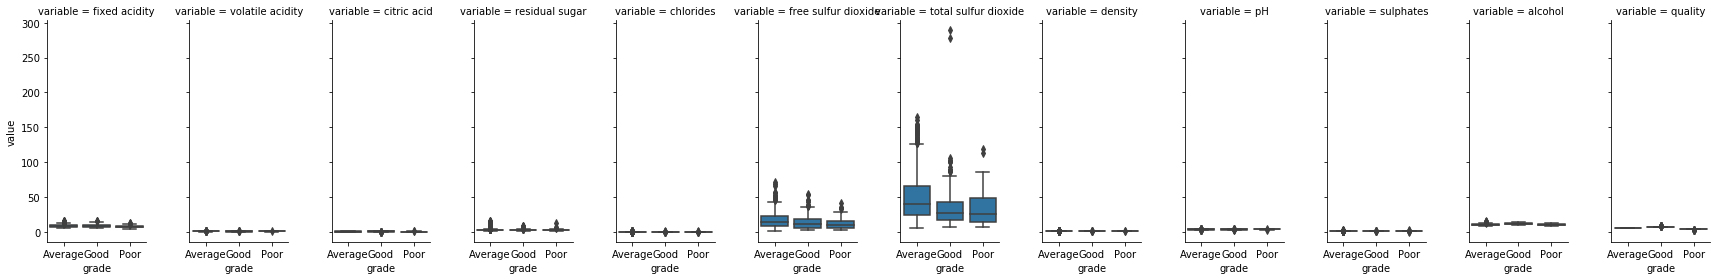

In [22]:
# Restructuring the data to use FacetGrid rather than making a boxplot for each variable individually.
df_long = red_wine
df_long = pd.melt(df_long, id_vars=['grade'])

g = sns.FacetGrid(df_long, col='variable', size=4, aspect=.5)
g = g.map(sns.boxplot, 'grade', 'value')

plt.show()

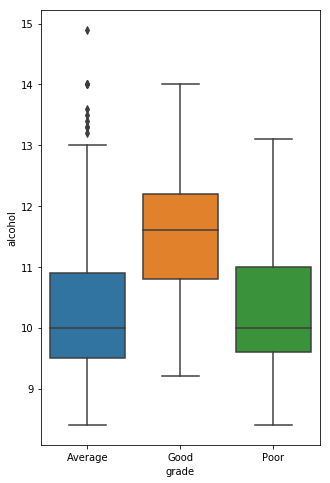

In [23]:
# The visual above is not the best, the variables with the highest correlation to our target variable have been isolated below.
plt.figure(figsize=(5,8))
sns.boxplot('grade', 'alcohol', data=red_wine)

plt.show()

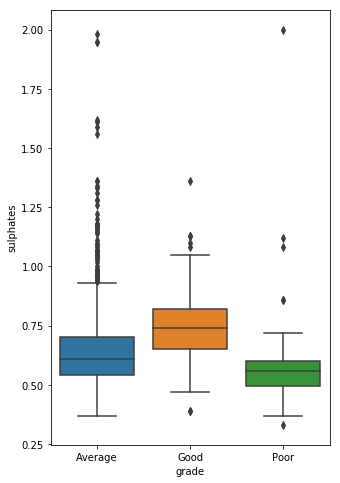

In [24]:
plt.figure(figsize=(5,8))
sns.boxplot('grade', 'sulphates', data=red_wine)

plt.show()

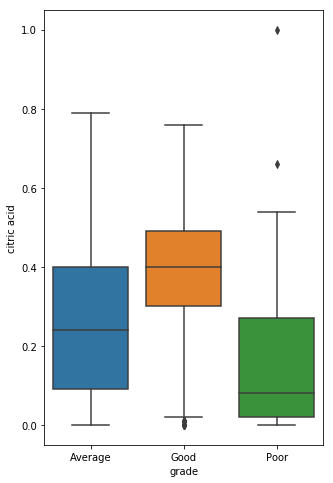

In [25]:
plt.figure(figsize=(5,8))
sns.boxplot('grade', 'citric acid', data=red_wine)

plt.show()

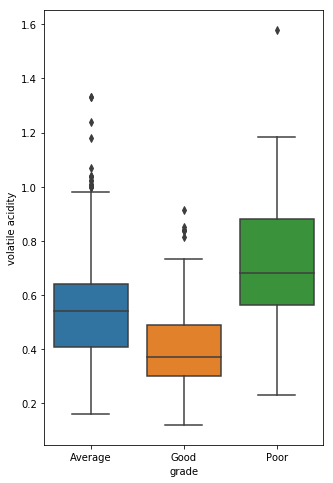

In [26]:
plt.figure(figsize=(5,8))
sns.boxplot('grade', 'volatile acidity', data=red_wine)

plt.show()

Alcohol is again shown to contribute the most to a red wine's quality rating or in this case, it's grade categorization.

There are outliers shown in each of these boxplots, but the variance or the distance between interquartile ranges is low. This likely explains the large volume of outliers in some variables.

In [18]:
# Encoding the categorical data.
red_wine['grade'] = red_wine['grade'].replace(['Good'], 1)
red_wine['grade'] = red_wine['grade'].replace(['Average'], 2)
red_wine['grade'] = red_wine['grade'].replace(['Poor'], 3)

In [19]:
red_wine['grade'].unique()

array([2, 1, 3], dtype=int64)

In [21]:
# Checking counts.
Counter(red_wine['grade'])

Counter({2: 1319, 1: 217, 3: 63})

In [22]:
# Split the data into X and y variables.
X = red_wine.iloc[:, :11]
y = red_wine['grade']

In [38]:
# Normalize the data so that all variables have a mean of 0 and standard deviation of 1.
X = StandardScaler().fit_transform(X)

In [27]:
sklearn_pca = PCA()
Y_sklearn = sklearn_pca.fit_transform(X)

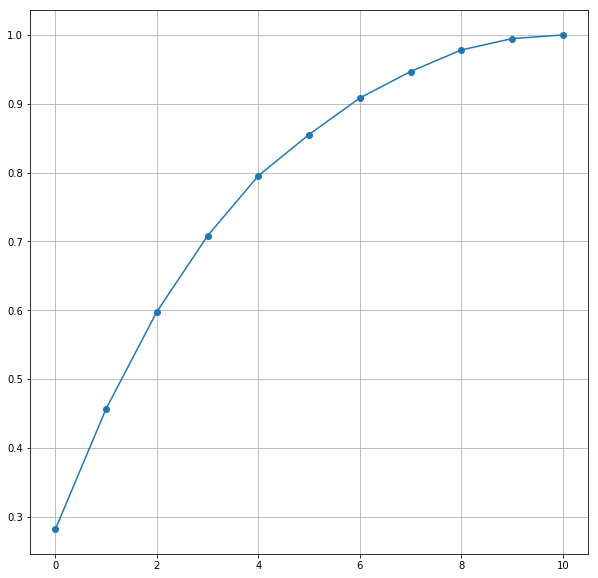

In [32]:
# PLotting to locate the principal components.
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(sklearn_pca.explained_variance_ratio_), 'o-')
plt.grid()

In [30]:
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483 0.00541439]


95% of the total variance is explained by eight of the overall components.

In [33]:
# Selecting the first 8 components for our prediction.
sklearn_pca2 = PCA(n_components=8)
X2 = sklearn_pca2.fit_transform(X)

In [37]:
# Splitting the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1199, 8)
(1199,)
(400, 8)
(400,)


In [41]:
# Gaussian Naive Bayes.
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predict = gnb.predict(X_test)

In [45]:
# Evaluationg GNB classifier with accuracy score and confusion matrix.
gnb_accuracy_score = accuracy_score(y_test, gnb_predict)
gnb_confusion_matrix = confusion_matrix(y_test, gnb_predict)

print(gnb_accuracy_score)
print(gnb_confusion_matrix)

0.81
[[ 19  25   1]
 [ 24 305  10]
 [  0  16   0]]


Gaussian Naive Bayes produces an 81% accuracy rate.

In [52]:
# Testing the model wtih different holdout groups.
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, random_state=20)

print('With 20% Holdout: ' + str(gnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(gnb.fit(X2, y).score(X2, y)))

With 20% Holdout: 0.815
Testing on Sample: 0.815509693558474


Scores are consistent, the model is not overfitting.

In [53]:
# Testing the model with cross validation.
cross_val_score(gnb, X2, y, cv=10)

array([0.73913043, 0.8447205 , 0.80745342, 0.81875   , 0.85      ,
       0.84375   , 0.7625    , 0.79874214, 0.83647799, 0.83544304])

In [89]:
cross_val_score(gnb, X2, y, cv=10).mean()

0.8136967511586934

Scores are relatively consistent.

In [110]:
# Test set validation for Gaussian Naive Bayes.
gnb_best = GaussianNB()
gnb_best_fit = gnb_best.fit(X_train, y_train)
gnb_best_predict = gnb_best.predict(X_test)
gnb_best.score(X_test, y_test)

0.815

In [59]:
# K-Nearest Neighbors Classifier, neighbors set to 1.
knnc = KNeighborsClassifier(n_neighbors=1)
knnc.fit(X_train, y_train)
knnc_pred = knnc.predict(X_test)

print(classification_report(y_test, knnc_pred))

knnc_accuracy_score = accuracy_score(y_test, knnc_pred)
print(knnc_accuracy_score)

             precision    recall  f1-score   support

          1       0.55      0.62      0.58        53
          2       0.91      0.87      0.89       335
          3       0.10      0.17      0.12        12

avg / total       0.84      0.81      0.83       400

0.815


In [60]:
# K-Nearest Neighbors Classifier, increased neighbors to 5.
knnc = KNeighborsClassifier(n_neighbors=5)
knnc.fit(X_train, y_train)
knnc_pred = knnc.predict(X_test)

print(classification_report(y_test, knnc_pred))

knnc_accuracy_score = accuracy_score(y_test, knnc_pred)
print(knnc_accuracy_score)

             precision    recall  f1-score   support

          1       0.51      0.45      0.48        53
          2       0.88      0.93      0.90       335
          3       0.00      0.00      0.00        12

avg / total       0.81      0.83      0.82       400

0.835


In [61]:
# K-Nearest Neighbors Classifier, increased neighbors to 10.
knnc = KNeighborsClassifier(n_neighbors=10)
knnc.fit(X_train, y_train)
knnc_pred = knnc.predict(X_test)

print(classification_report(y_test, knnc_pred))

knnc_accuracy_score = accuracy_score(y_test, knnc_pred)
print(knnc_accuracy_score)

             precision    recall  f1-score   support

          1       0.55      0.49      0.52        53
          2       0.89      0.93      0.91       335
          3       0.00      0.00      0.00        12

avg / total       0.82      0.85      0.83       400

0.8475


In [63]:
# Testing the model with cross validation.
cross_val_score(knnc, X2, y, cv=10)

array([0.80124224, 0.81987578, 0.80745342, 0.8       , 0.8625    ,
       0.83125   , 0.775     , 0.78616352, 0.8490566 , 0.82911392])

In [87]:
cross_val_score(knnc, X2, y, cv=10).mean()

0.8336423038182366

Scores are relatively consistent.

The K-Nearest Neighbors CLassifier with the most neighbors (k = 10) produced the highest accuracy rate, 85%.

In [109]:
# Test set validation for K-Nearest Neighbors Classifier.
knnc_best = KNeighborsClassifier(n_neighbors=10)
knnc_best_fit = knnc_best.fit(X_train, y_train)
knnc_best_predict = knnc_best.predict(X_test)
knnc_best.score(X_test, y_test)

0.8475

In [72]:
# Random Forest CLassifier.
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)

In [73]:
# Evaluationg RFC with accuracy score and confusion matrix.
rfc_accuracy_score = accuracy_score(y_test, rfc_predict)
rfc_confusion_matrix = confusion_matrix(y_test, rfc_predict)

print(rfc_accuracy_score)
print(rfc_confusion_matrix)

0.87
[[ 28  25   0]
 [ 15 320   0]
 [  0  12   0]]


In [75]:
# Random Forest CLassifier, increasing the number of estimators.
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)

In [76]:
# Evaluationg RFC with accuracy score and confusion matrix.
rfc_accuracy_score = accuracy_score(y_test, rfc_predict)
rfc_confusion_matrix = confusion_matrix(y_test, rfc_predict)

print(rfc_accuracy_score)
print(rfc_confusion_matrix)

0.8925
[[ 29  24   0]
 [  7 328   0]
 [  0  12   0]]


In [85]:
# Testing the model with cross validation.
cross_val_score(rfc, X2, y, cv=10)

array([0.81987578, 0.85093168, 0.82608696, 0.81875   , 0.83125   ,
       0.84375   , 0.83125   , 0.85534591, 0.86163522, 0.84177215])

In [86]:
cross_val_score(rfc, X2, y, cv=10).mean()

0.8418226310264295

Scores are consistent, the model is not overfitting.

By increasing the number of estimators to 250 (anything above either produced the same accuracy rate or lower), the model's accuracy score improved to 89%.

In [107]:
# Test set validation for Random Forest Classifier.
rfc_best = RandomForestClassifier(n_estimators=250)
rfc_best_fit = rfc_best.fit(X_train, y_train)
rfc_best_predict = rfc_best.predict(X_test)
rfc_best.score(X_test, y_test)

0.885

In [94]:
# Support Vector Machince Classifier with linear kernel.
linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)
linear_svc_predict = svc.predict(X_test)

print(classification_report(y_test, linear_svc_predict))

linear_svc_accuracy_score = accuracy_score(y_test, linear_svc_predict)
print(linear_svc_accuracy_score)

             precision    recall  f1-score   support

          1       0.63      0.36      0.46        53
          2       0.88      0.97      0.92       335
          3       0.00      0.00      0.00        12

avg / total       0.82      0.86      0.83       400

0.8575


C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [96]:
# Testing the linear model with cross validation.
cross_val_score(linear_svc, X2, y, cv=10)

array([0.81987578, 0.81987578, 0.81987578, 0.825     , 0.825     ,
       0.825     , 0.825     , 0.83018868, 0.83018868, 0.82911392])

In [97]:
cross_val_score(linear_svc, X2, y, cv=10).mean()

0.8249118611733746

In [95]:
# Support Vector Machince Classifier with linear kernel.
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)
rbf_svc_predict = svc.predict(X_test)

print(classification_report(y_test, rbf_svc_predict))

rbf_svc_accuracy_score = accuracy_score(y_test, rbf_svc_predict)
print(rbf_svc_accuracy_score)

             precision    recall  f1-score   support

          1       0.63      0.36      0.46        53
          2       0.88      0.97      0.92       335
          3       0.00      0.00      0.00        12

avg / total       0.82      0.86      0.83       400

0.8575


C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [98]:
# Testing the RBF model with cross validation.
cross_val_score(rbf_svc, X2, y, cv=10)

array([0.8136646 , 0.83850932, 0.80745342, 0.775     , 0.8625    ,
       0.875     , 0.825     , 0.8427673 , 0.83647799, 0.84810127])

In [99]:
cross_val_score(rbf_svc, X2, y, cv=10).mean()

0.83244738780342

Support Vector Machine Classifier produces the same accuracy rate with either a linear kernel or the default kernel, RBF. Cross validation for the linear model shows more consistent scores.

The accuracy rate for the Support Vector Machine Classifier using the linear kernel is 86%.

In [111]:
# Test set validation for Support Vector Machine CLassifier with linear kernel.
svm_best = SVC(kernel='linear')
svm_best_fit = svm_best.fit(X_train, y_train)
svm_best_predict = svm_best.predict(X_test)
svm_best.score(X_test, y_test)

0.8375

The model that produces the highest accuracy rate in classifying red wines in quality is the Random Forest Classifier at 89%.

We could look to further improve accuracy within each of our models by fine tuning the parameters for each classifier.